In [1]:
import anndata as ad
import ACTIONet as anet

In [2]:
%load_ext autoreload
%autoreload 2
%aimport ACTIONet

In [3]:
adata = ad.read_h5ad("../data/pfc5k_counts_only.h5ad")

In [4]:
adata2 = anet.pp.normalize(adata, copy = True)

In [5]:
print(adata2.X[0:5, 0:10].toarray().T)

[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         1.43148847 0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [1.57973691 0.         1.72499038 0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]


In [6]:
anet.pp.reduce_adata(adata2)

Computing reduced ACTION kernel (sparse):
	Performing SVD on original matrix: IRLB (sparse) -- A: 17658 x 4505


In [7]:
print(adata2.obsm["ACTION"][0:5, 0:5])

[[ 11.01893973   9.06837029 -15.69997786  27.50794143  -1.99668638]
 [ 11.31674892   9.06837029 -16.17988985  29.10352969  -2.51962805]
 [ 10.27441678   9.06837029 -16.31700756  27.69941202  -2.18684699]
 [ 11.91236728  11.79768561 -18.51089093  30.44382382  -3.32781063]
 [ 12.35908105  10.03683701 -16.38556641  29.10352969  -3.99337276]]


In [8]:
anet.run_ACTIONet(adata2) 

Running ACTION (10 threads):
	Iterating from k = 2 ... 30: 29/29 finished
Joining trace of C & H matrices (depth = 30) ... done (464 archetypes)
Pruning archetypes:
	Non-specific archetypes: 5
	Unreliable archetypes: 17
	Trivial archetypes: 0
Unifying 442 archetypes (10 threads):
# unified archetypes: 23
Building adaptive network (density = 1.00)
	Building index ... done
	Identifying nearest neighbors ... done
	Constructing adaptive-nearest neighbor graph ... done
	Finalizing network ... 
		Keeping mutual nearest-neighbors only ... done
Laying-out input network: method = umap, a = 0.115, b = 1.929 (epochs = 100, threads=10)
Computing 2D layout ... done
Computing 3D layout ... done
Computing de novo node colors ... done
Computing feature specificity ... done
Building adaptive network (density = 0.50)
	Building index ... done
	Identifying nearest neighbors ... done
	Constructing adaptive-nearest neighbor graph ... done
	Finalizing network ... 
		Keeping mutual nearest-neighbors only ... 

/Users/mohammadi/miniconda3/envs/actionet/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



<AxesSubplot: title={'center': '__annotations__'}, xlabel='actionet2d1', ylabel='actionet2d2'>

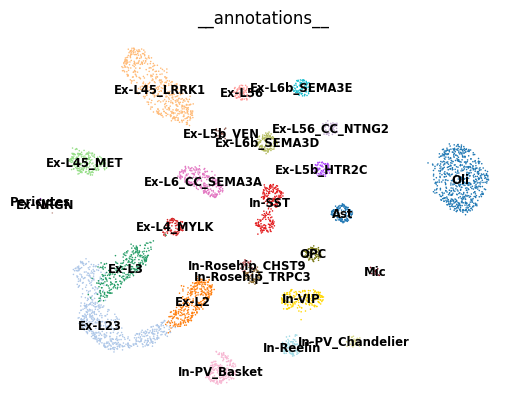

In [9]:
anet.pl.plot_ACTIONet(adata2, "Celltype")

In [10]:
adata2.write_h5ad("../data/pfc5k_ACTIONet_v2_python.h5ad")